<a href="https://colab.research.google.com/github/fhzhkunming/ST554_HW4/blob/main/HW4_Hui.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ST554 Homework 4

Hui Fang

2/6/2026

# Instructions
For this homework you will create a public `gitHub` repo and a python notebook (`.ipynb` file) using Google Colab. You’ll save your Google Colab document on your `gitHub` repo (check the box that says ‘Include a
link to Colab’). You’ll submit a link to your `gitHub` repo. Please make sure to change the sharing settings
so that anyone with the link can see the notebook.

The purpose of this homework is to practice summarizing data using `pandas` and `matplotlib` and do some more advanced function writing.

# Summarizing Student Data Graphically

For this part, we’ll revisit the [StudentData](https://www4.stat.ncsu.edu/online/datasets/StudentData.txt).txt data that comes from the UCI machine learning repository. Information about the [variables in the dataset can be found here](https://archive.ics.uci.edu/dataset/320/student+performance). I want you to look at the math scores data set.

You should read up on the variables. The dataset is generally about math scores (G1, G2, G3) for students from two different schools. They also measure a bunch of things about the students’ home life. Hopefully you can make some interesting connections!

# Bring in Homework 3 Code
• Copy your code and markdown cells from homework 3 that read in the data and summarized it numerically.

• We were essentially starting an EDA there.

• **Our goal is to now add to this basic EDA by including graphs that describe the variables.**

# Summarizing Data Numerically
For this part, we’ll use the StudentData.txt data (available here https://www4.stat.ncsu.edu/~online/
datasets/StudentData.txt) that comes from the UCI machine learning repository. Information about the
variables in the dataset can be found here https://archive.ics.uci.edu/ml/datasets/Student+Performance. I
want you to look at **the math scores data set**.

## Task 1: Read in the data
- You can either read this dataset from the URL or download it and read it in locally. Check out the first few observations of the data.

In [2]:
import numpy as np
import pandas as pd # import pandas module
import matplotlib.pyplot as plt # import the pyplot module and alias it as plt
math_score = pd.read_csv("https://www4.stat.ncsu.edu/~online/datasets/StudentData.txt", # read in data via URL
                         sep = ";")
math_score.head() # check the first few observations of the data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


---
## Task 2: Summarize the Data
### Categroical variables


In [3]:
# create a two-way contingency table
failure_table = pd.crosstab(
    math_score["sex"].replace({"F":"Female" , "M": "Male"}),
    math_score["failures"],
    dropna = False,
    margins = False)
failure_table

failures,0,1,2,3
sex,,,,
Female,168,23,11,6
Male,144,27,6,10


The two-way shows that among the 208 females, 168 of them never failed, 23 failed once, 11 failed twice, and 6 failed three times. Among the males, 144 never failed, 27 failed once, 6 failed twice, and 10 failed 3 times.

Text(0.5, 1.0, 'Student counts by sex and failure times')

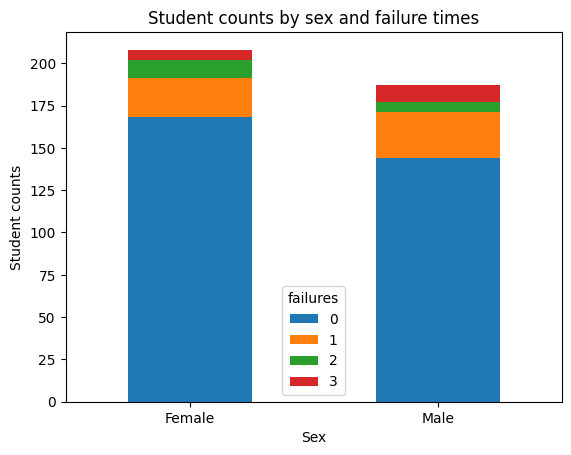

In [4]:
# Crate a stacked bar graph
failure_table.plot.bar(stacked = True, rot = 0)
plt.xticks(rotation = 0) # Keep the x-axis labels horizontally
plt.xlabel("Sex") # put x-axis label
plt.ylabel("Student counts") # put y-axis label
plt.title("Student counts by sex and failure times") # give plot title

Text(0.5, 1.0, 'Student counts by sex and failure times')

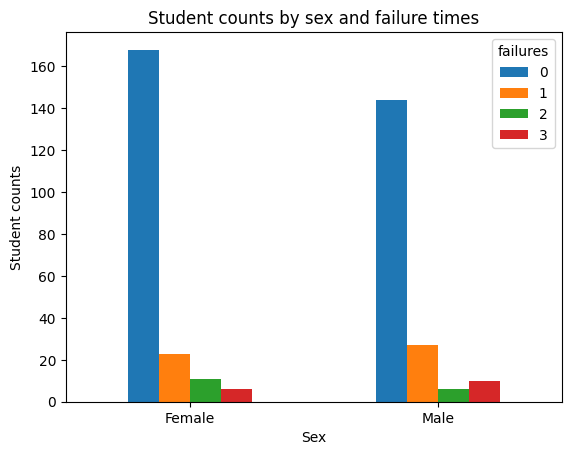

In [5]:
# create a side-by-side bar graph
failure_table.plot.bar()
plt.xticks(rotation = 0) # Keep the x-axis labels horizontally
plt.xlabel("Sex") # put x-axis label
plt.ylabel("Student counts") # put y-axis label
plt.title("Student counts by sex and failure times") # give plot title

The bar charts show that both female and male students follow the same general pattern: most students have zero failures, and the number of students decreases as the number of failures increases. However, the charts also reveal some differences between the groups. Females have slightly higher counts in the 0‑, 1‑, and 2‑failure categories, reflecting their larger overall sample size. In contrast, males have a noticeably higher count in the 3‑failures category, even though there are fewer males overall. The side‑by‑side plot makes these differences easy to compare directly, while the stacked plot highlights how strongly both distributions are dominated by students with no failures.


In [6]:
# create a three-way contingency table
pd.crosstab(
    math_score["sex"].replace({"F":"Female" , "M": "Male"}),
    [math_score["failures"],
    math_score["famsup"]],
    dropna = False,
    margins = True)

failures    0        1      2      3      All
famsup     no  yes  no yes no yes no yes     
sex                                          
Female     50  118  10  13  4   7  2   4  208
Male       65   79  15  12  1   5  6   4  187
All       115  197  25  25  5  12  8   8  395

Among female students, most of those who never failed had family support: 118 received support, compared with 50 who did not. A similar pattern appears among those who failed once, where 13 had family support and 10 did not. For students who failed twice, 7 had support and 4 did not, and among those who failed three times, 4 had support while 2 did not.

Male students show a comparable distribution. Among those who never failed, 79 had family support and 65 did not. For students who failed once, 12 had support and 15 did not. Among those who failed twice, 5 had support and 1 did not, and for those who failed three times, 4 had support while 6 did not.

The table indicates a correlation between family support and better academic outcomes.



- Create a conditional two-way table. That is, condition on one variable’s setting and create a two-way table. Do this using two different methods:

  – Once, by subsetting the data (say with `.loc`) and then creating the two-way table
  

In [7]:
math_score_nonf = math_score.loc[math_score["failures"] == 0] # subset the data with failures = 0
# create two-way contingency table with the subsetted data
pd.crosstab(
    math_score_nonf["sex"].replace({"F":"Female" , "M": "Male"}),
    math_score_nonf["failures"],
    dropna = False,
    margins = False)


failures,0
sex,
Female,168
Male,144


This table shows that for those never failed students, females performed slightly better than male. The difference suggests that female students may have a slightly higher rate of academic success in terms of avoiding failures.

In [8]:
# create a new variable named "fail_group" based on 0 failure or not
math_score["fail_group"] = math_score["failures"].apply(
    lambda x: "0 failure" if x == 0 else "1-3 failures") # use a lambda function to set two groups

# create a twy-way contingency table
fail_group_table = pd.crosstab(
    math_score["sex"].replace({"F":"Female" , "M": "Male"}),
    math_score["fail_group"])
fail_group_table

fail_group,0 failure,1-3 failures
sex,,
Female,168,40
Male,144,43


<Figure size 800x500 with 0 Axes>

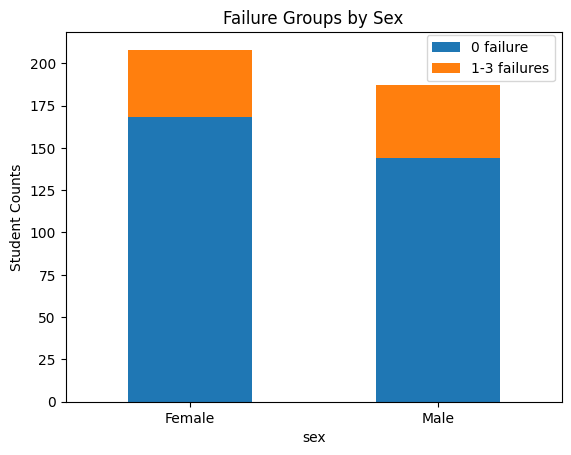

<Figure size 1000x500 with 0 Axes>

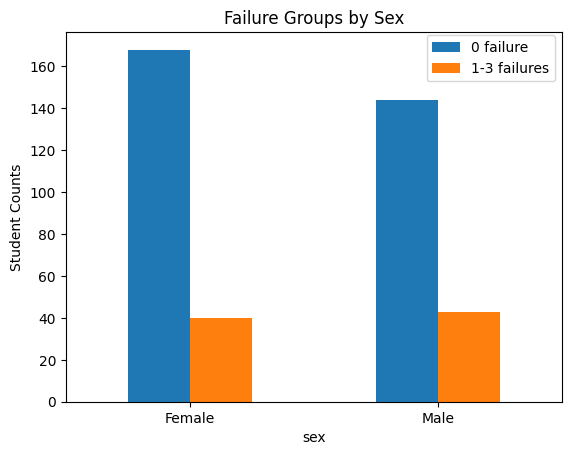

In [9]:
# Create a stacked bar chart with the failure group table
plt.figure(figsize = (8, 5))                                 # set the figure size
fail_group_table.plot.bar(stacked = True, rot = 0)           # create the stacked bar
plt.title("Failure Groups by Sex")                           # set the plot title
plt.ylabel("Student Counts")                                 # set the y-axis label
plt.legend(loc = "upper right", bbox_to_anchor = (1,1.01))   # format the legend

# Create a side-by-side chart with the failure group table
plt.figure(figsize = (10, 5))                               # set the figure size
fail_group_table.plot.bar(stacked = False, rot = 0)         # create the side-by-side bar
plt.title("Failure Groups by Sex")                          # set the plot title
plt.ylabel("Student Counts")                                # set the y-axis label
plt.legend(loc = "upper right", bbox_to_anchor = (1,1.01))  # format the legend

The two-way contingency table and the two bar plots show that among students who never failed, females (168) slightly outperform males (144). Among those with 1–3 failures, the numbers for males and females are very similar. This modest difference suggests that females may have a slightly higher rate of academic success in terms of avoiding failures.

 – Once, by creating a three-way table and subsetting it.

In [10]:
# create a three-way table
three_way = pd.crosstab(
    math_score["sex"].replace({"F":"Female" , "M": "Male"}),
    [math_score["failures"],
    math_score["famsup"]],
    dropna = False,
    margins = True)
# subset the three-way table to get a conditional two-way table
conditional_two_way = three_way.xs("yes", level = "famsup", axis = 1) # subset the three-way table for those famsup = yes
conditional_two_way

failures,0,1,2,3
sex,,,,
Female,118,13,7,4
Male,79,12,5,4
All,197,25,12,8


The table shows that among students who received family support, the majority never failed. Among the 197 students with zero failures, females (118) outperformed males (79). Among those who failed 1–3 times, the numbers for males and females are very similar. Overall, the distribution suggests that for students with family support, failure is relatively uncommon for both groups, with only small gender differences.

In [11]:
# get the mean, median, and standard deviation for age, absences, and G3 variables
math_score[['age', 'absences', 'G3']].agg(['mean','median','std', 'var'])

,age,absences,G3
mean,16.696203,5.708861,10.415190
median,17.000000,4.000000,11.000000
std,1.276043,8.003096,4.581443
var,1.628285,64.049541,20.989616


The table shows that the mean student age is 16.69, with a standard deviation of 1.27 years and a variance of 1.63. Students have an average of 5.71 absences, with a standard deviation of 8.00 and a variance of 64.05. The mean G3 score is 10.42, with a median of 11, a standard deviation of 4.58, and a variance of 20.99. There is very little variation in age, while absences vary much more widely than either age or G3.

In [12]:
math_scoreF = math_score.loc[math_score["sex"] == "F"] # subsetting the data with female students
math_scoreF[['age', 'absences', 'G3']].agg(['mean','median','std','var']) # calculate the mean, median, standard deviation, and variance

,age,absences,G3
mean,16.730769,6.216346,9.966346
median,17.000000,4.000000,10.000000
std,1.201696,9.445819,4.622338
var,1.444073,89.223500,21.366012


The table shows that among female students, age has relatively little variation, with a mean of 16.73, a standard deviation of 1.20, and a variance of 1.44. Absences show much wider variation than either age or G3. The mean G3 score is 9.97, with a median of 10 and a standard deviation of 4.62, indicating moderate spread in final grades.

- Find measures of center and spread across a single grouping variable for three of these variables
(including G3 as one of them)

In [13]:
# use the groupby() function to compute the mean, median, standard deviation, and variance for age, absences, and G3 groupped by family support.
math_score.groupby("famsup")[['age', 'absences', 'G3']] \
.agg(['mean','median','std', 'var'])

age                             absences                   \
             mean median       std       var      mean median       std   
famsup                                                                    
no      16.921569   17.0  1.330460  1.770124  5.464052    4.0  8.398799   
yes     16.553719   16.0  1.221865  1.492953  5.863636    4.0  7.756272   

                          G3                              
              var       mean median       std        var  
famsup                                                    
no      70.539818  10.640523   11.0  4.636262  21.494926  
yes     60.159751  10.272727   11.0  4.550318  20.705394

The table shows the mean, median, standard deviation, and variance of age, absences, and final grade (G3) grouped by family support. The values for students with and without family support are very similar across all three variables. Students with family support are slightly younger on average, while absences and G3 scores differ only minimally between the two groups.

- Find measures of center and spread across two grouping variables for three of these variables (including
G3 as one of them)

In [14]:
# calculate the center and spread across 'famsup' (family support) and 'sex' for age, absences, and G3.
math_score.groupby(["famsup", math_score["sex"] \
                    .replace({"F": "Female", "M": "Male"})])[['age', 'absences', 'G3']] \
                    .agg(['mean','median','std', 'var'])

age                             absences         \
                    mean median       std       var      mean median   
famsup sex                                                             
no     Female  16.969697   17.0  1.227501  1.506760  6.848485    4.0   
       Male    16.885057   17.0  1.409480  1.986635  4.413793    3.0   
yes    Female  16.619718   17.0  1.177402  1.386275  5.922535    4.0   
       Male    16.460000   16.0  1.282516  1.644848  5.780000    4.0   

                                             G3                              
                     std         var       mean median       std        var  
famsup sex                                                                   
no     Female  11.109583  123.422844  10.363636   11.0  4.818670  23.219580  
       Male     5.366892   28.803528  10.850575   11.0  4.509754  20.337878  
yes    Female   8.591662   73.816652   9.781690   10.0  4.533745  20.554840  
       Male     6.426869   41.304646  10.970000   11.0  4.504666  20.292020

The table shows the center and spread of age, absences, and final grade (G3) across family support and gender. Within each gender, the values for students with and without family support are very similar across all three variables. Among students without family support, males have fewer absences on average than females. The mean final grade is slightly higher for males than females regardless of family support. What stands out is that family support does not appear to meaningfully change age, absences, or G3 within either gender, suggesting that gender differences are more noticeable than family‑support differences in this subset.

- Create a correlation matrix between all of the numeric variables

In [15]:
# calculate the correlation matrix between all the five numeric variables
math_score[["age", "absences", "G1", "G2", "G3"]].corr()

,age,absences,G1,G2,G3
age,1.000000,0.175230,-0.064081,-0.143474,-0.161579
absences,0.175230,1.000000,-0.031003,-0.031777,0.034247
G1,-0.064081,-0.031003,1.000000,0.852118,0.801468
G2,-0.143474,-0.031777,0.852118,1.000000,0.904868
G3,-0.161579,0.034247,0.801468,0.904868,1.000000


Age is weakly negatively correlated with all three grade measures (G1, G2, and G3). Absences show almost no relationship with any of the grades, with correlations very close to zero. The strongest pattern in the table is the high positive correlation among G1, G2, and G3, indicating that earlier grades strongly predict later performance.

## Numeric variables (and across groups)

The numeric variables are age, absences, and the three test grades variables (G1, G2, and G3).

- Create a histogram, kernel density plot, and boxplot for two of the numeric variables across one of the categorical variables (that is, create graphs that can compare the distributions across the groups). For at least one of the kernel density plots across groups, make sure that the graphs are overlayed on the same plot. Add appropriate labels and titles.

- Create two scatterplots relating G3 to other numeric variables (G3 on the y-axis). Color the points by a categorical variable in each. Add appropriate labels and titles.

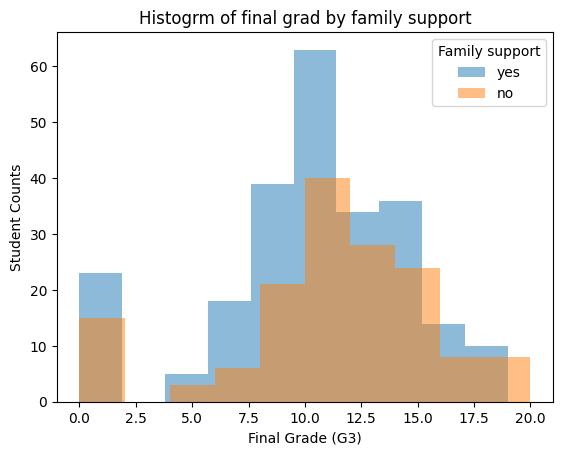

In [16]:
# create a histogram for G3 with family support
bins = 10 # set the bin size
 # plot G3 for students WITH family support
math_score[math_score["famsup"] == "yes"]["G3"].plot.hist(bins = bins, alpha = 0.5, label = "yes")
#plot G3 for students WITHOUT family support
math_score[math_score["famsup"] == "no"]["G3"].plot.hist(bins = bins, alpha = 0.5, label = "no")
plt.xlabel("Final Grade (G3)")                           # label the x-axis
plt.ylabel("Student Counts")                             # label the y-axis
plt.title("Histogrm of final grad by family support")    # title the plot
legend = plt.legend()                                    # create the legend
legend.set_title("Family support")                       # add a title to the legend

The histogram shows the distribution of final grades (G3) for students with and without family support. Students with family support appear more frequently in the middle-grade range, especially around scores 9 - 11. Both groups have similar overall shapes, but the “yes” group has slightly higher counts across most final grades, suggesting that students with family support are more common in the dataset and cluster around average performance.

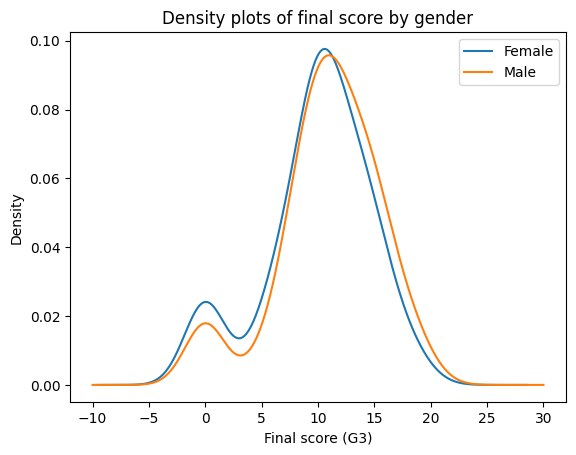

In [17]:
# Create a kernel density plot females
math_score[math_score["sex"] == "F"]["G3"].plot.density(bw_method = 0.4, label = "Female")
# Create a kenel density plot for males
math_score[math_score["sex"] == "M"]["G3"].plot.density(bw_method = 0.4, label = "Male")
plt.title("Density plots of final score by gender")     # add a plot title
plt.xlabel("Final score (G3)")                          # label the x-axis
plt.legend()                                            # show the legend

The density plot shows the distribution of final grades (G3) for male and female students. The two curves have very similar shapes, indicating that the grade distributions for males and females are nearly the same. Both groups peak around the middle-grade range, and neither group shows noticeably higher or lower performance across the distribution.

Text(0.5, 0, 'Family Support')

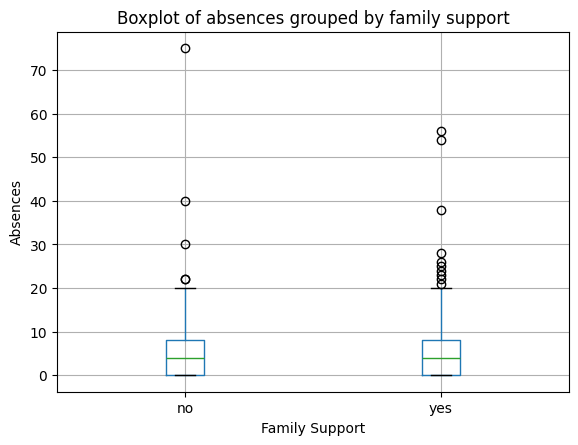

In [18]:
# create a box plot
math_score.boxplot(column = ["absences"], by = "famsup")   # create the box plot
plt.suptitle("")                                           # remove the automatic pandas title
plt.title("Boxplot of absences grouped by family support") # add plot title
plt.ylabel("Absences")                                     # label the y-axis
plt.xlabel("Family Support")                               # label the x-axis

The boxplot compares absences for students with and without family support. The two groups have very similar medians and interquartile ranges, indicating that typical absence levels do not differ much by family support. The main difference appears in the spread of extreme values: the group with family support shows more high-absence outliers, suggesting that while most students behave similarly, a small number of students with family support have unusually high absence counts.

<Axes: title={'center': 'Scatter plots for G2 and G3 by sex'}, xlabel='G2', ylabel='G3'>

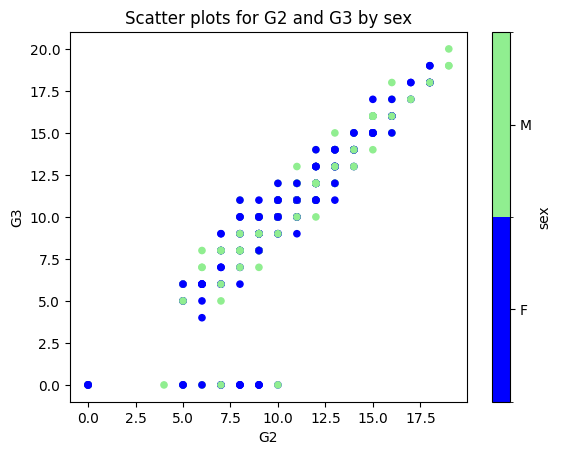

In [51]:
# create a scatter plot for G2 vs G3
from matplotlib.colors import ListedColormap                # import tool for creating custom colormaps
math_score["sex"] = math_score["sex"].astype("category")    # convert sex variable to category
math_score.plot.scatter(                                    # creat scatter plot
    x = "G2",                                               # label x-axis
    y = "G3",                                               # label y-axis
    c ="sex",                                               # color points by sex
    cmap = ListedColormap(["blue", "lightgreen"]),          # set two-color scheme for category
    title = "Scatter plots for G2 and G3 by sex")           # add a plot title

The scatter plot shows the relationship between G2 and G3, separated by sex. The points form a clear upward trend, indicating a strong linear relationship: students with higher G2 scores tend to also have higher final grades (G3). The two sex groups overlap almost completely, suggesting that sex does not meaningfully change the relationship between G2 and G3.

<Axes: title={'center': 'Scatter plots for final grade vs absences'}, xlabel='absences', ylabel='G3'>

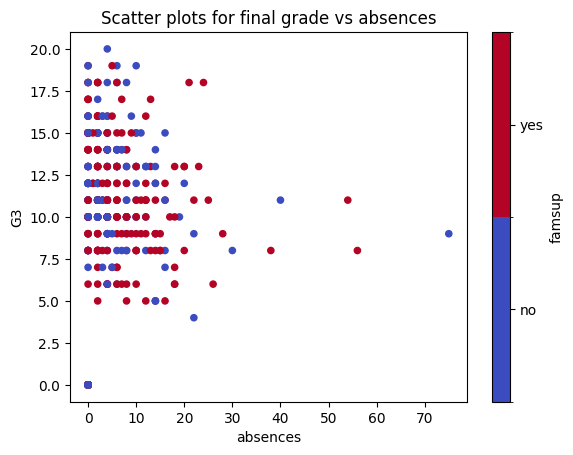

In [53]:
# create a scotter plot for G3 vs absences
math_score["famsup"] = math_score["famsup"].astype("category") # convert famsup variable to category
math_score.plot.scatter(                                       # create scatter plot
    x = "absences",                                            # label x-axis
    y = "G3",                                                  # label y-axis
    c ="famsup",                                               # color points by family support (famsup)
    cmap = "coolwarm",                                         # two-color scheme for categories
    title = "Scatter plots for final grade vs absences")       # add a plot title

The scatter plot shows the relationship between final grade (G3) and absences, separated by family support (famsup). There is a clear negative relationship: students with more absences tend to have lower final grades. The two family-support groups overlap heavily, indicating that family support does not create a strong difference in the overall pattern. Both groups follow the same downward trend, suggesting that absences are a more important factor than family support in predicting final performance.

# Plotting the NFL Data

For this part we'll read in the NFL Box Score data that we read in class videos. [The data is available here](www4.stat.ncsu.edu/~online/datasets/scoresFull.csv).

You may not be familiar with (American) football, but each row of this dataset represents information about one particular game. The most important thing is the score for the home and away teams (`AQ1`, . . . , `AFinal`, `HQ`, . . . , `HFinal`). Other variables like yards gained (passing or rushing or combined) can be good indicators of score. Things like turnovers, penalties, etc. can also be indicators of how the game went.

## Task 1: Read in the data
• You can either read this dataset from the URL or download it and read it in locally. Check out the first few observations of the data.

• Convert the `homeTeam, awayTeam, day, stadium, startTime, toss, roof`, and `surface` to `category` type variables.

In [57]:
# Readin data
import numpy as np
import pandas as pd
nlf_data = pd.read_csv("https://www4.stat.ncsu.edu/~online/datasets/scoresFull.csv")
args = ["homeTeam", "awayTeam", "day", "stadium", "startTime", "toss", "roof", "surface"]
nlf_data[args] = nlf_data[args].astype("category")
nlf_data.head()

,week,date,day,season,awayTeam,AQ1,AQ2,AQ3,AQ4,AOT,...,homeFumLost,homeNumPen,homePenYds,home3rdConv,home3rdAtt,home4thConv,home4thAtt,homeTOP,HminusAScore,homeSpread
0,1,5-Sep,Thu,2002,San Francisco 49ers,3,0,7,6,-1,...,0,10,80,4,8,0,1,32.47,-3,-4.0
1,1,8-Sep,Sun,2002,Minnesota Vikings,3,17,0,3,-1,...,1,4,33,2,6,0,0,28.48,4,4.5
2,1,8-Sep,Sun,2002,New Orleans Saints,6,7,7,0,6,...,0,8,85,1,6,0,1,31.48,-6,6.0
3,1,8-Sep,Sun,2002,New York Jets,0,17,3,11,6,...,1,10,82,4,8,2,2,39.13,-6,-3.0
4,1,8-Sep,Sun,2002,Arizona Cardinals,10,3,3,7,-1,...,0,7,56,6,10,1,2,34.40,8,6.0


## Task 2: Summarize the data
• I want you to look at some trends during the regular season. This means you should remove any data where the week is not 1 through 17.

• You should summarize some of the variables grouped by season and week, season alone, and week alone (three different scenarios).

  – Produce some common numeric summaries of variables across these different groups.

  – Similarly, produce some common plots over time (mostly line plots I’d think!)

• Write at least one function that can be used to easily create a plot for this data.

  – For instance, you might have a function that takes in a numeric variable and a statistic (or a categorical variable, etc.). Then the function plots the average (or some other statistic) of the numeric variable across the seasons.

  – This is just an example! You get to decide what might be useful to do here.

  – Add in type hints for the inputs (`pd.DataFrame` was one I used) using **annotations** in the function definition.

  – Don’t worry about type hinting the output. If you are interested, something like this could work. . .

  – Add the timeit decorator used in the class notes as well so information is printed out about how long the code took to run.

  – Run this function with three different settings of inputs (to obtain three different graphs of the same type - or whatever it is your function does!)

**After each graph, you should discuss what is interesting about it or what it tells you!**